In [1]:
import sys
print(sys.version)

3.6.1 |Continuum Analytics, Inc.| (default, Mar 22 2017, 19:25:17) 
[GCC 4.2.1 Compatible Apple LLVM 6.0 (clang-600.0.57)]


In [11]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from matplotlib import gridspec
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [12]:
file_name = "ExperimentData.csv"

df = pd.read_csv(file_name)

columns = df.columns.values
types = ["slider_grey", "slider_num", "wrist_grey", "wrist_num", "arm_grey", "arm_num"]
type_frames = []
for t in types:
    type_frames.append(df.loc[df['type'] == t])

slider_grey


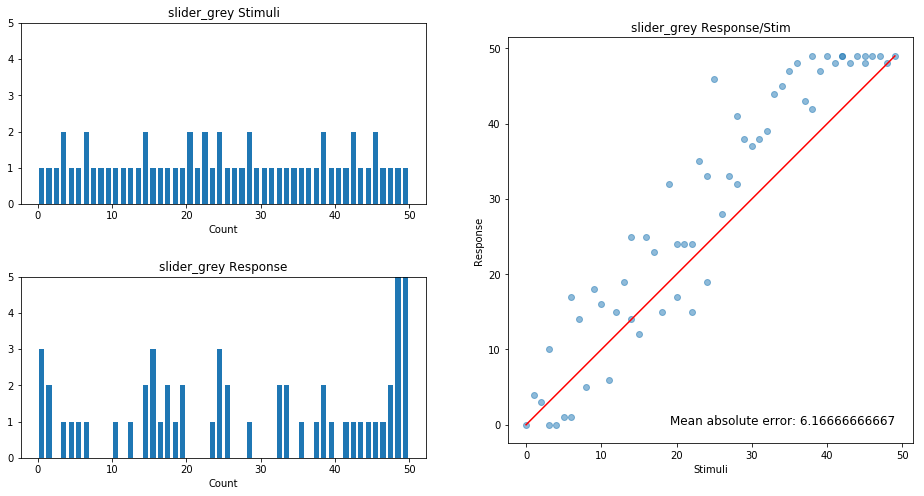

slider_num


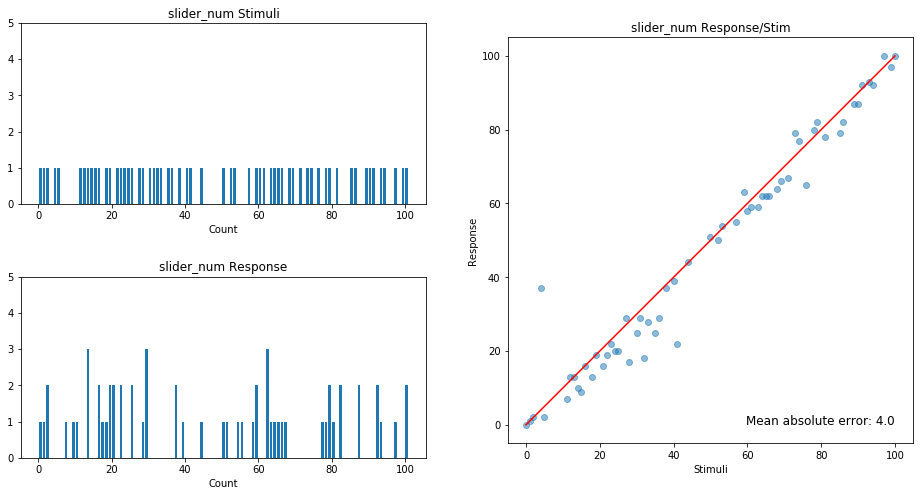

wrist_grey


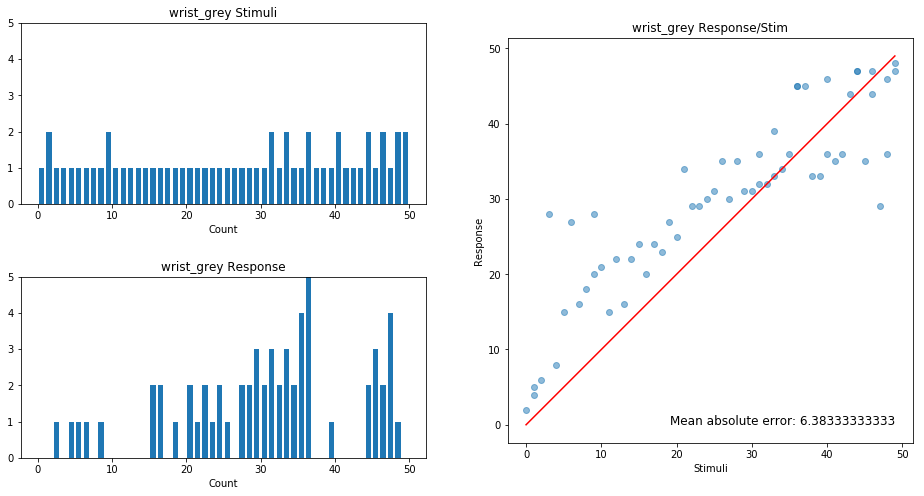

wrist_num


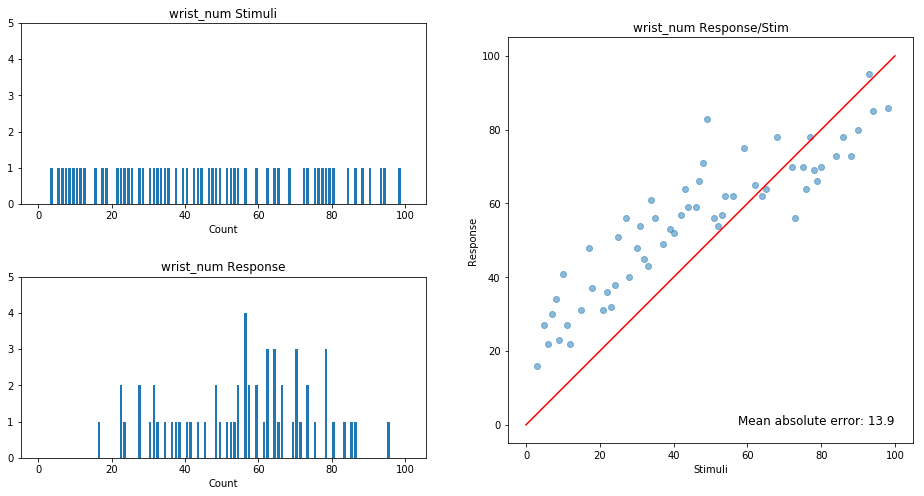

arm_grey


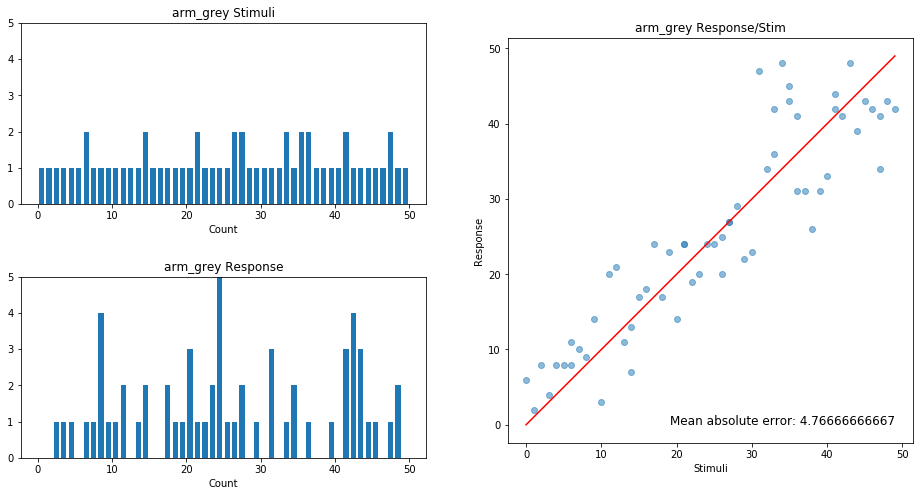

arm_num


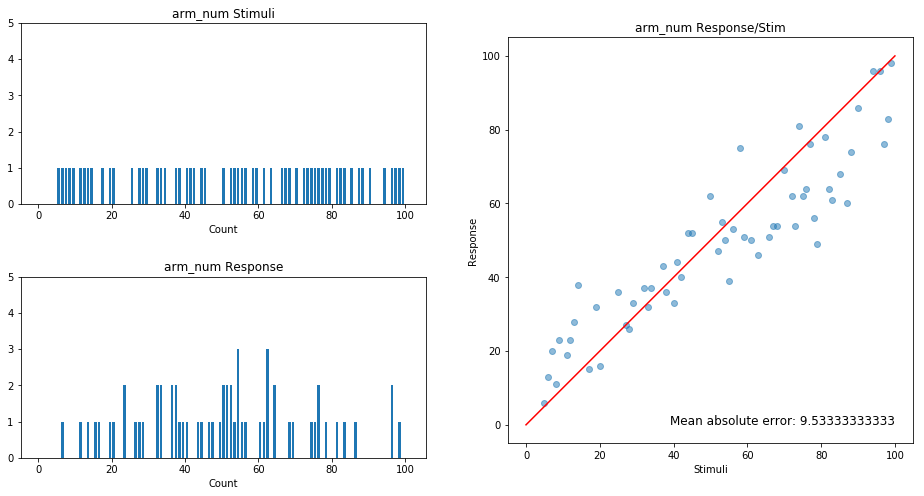

In [17]:
errors = []
for i in range(6):
    print(types[i])
    x = type_frames[i].loc[: , columns[7]]
    y = round(type_frames[i].loc[: , columns[8]])
    if "grey" in types[i]:
        hist1, bins1 = np.histogram(x, bins=range(51))
        hist2, bins2 = np.histogram(y, bins=range(51))
        yMax = 49
    else:
        hist1, bins1 = np.histogram(x, bins=range(102))
        hist2, bins2 = np.histogram(y, bins=range(102))
        yMax = 100
    
    width1 = 0.7 * (bins1[1] - bins1[0])
    center1 = (bins1[:-1] + bins1[1:]) / 2
    width2 = 0.7 * (bins2[1] - bins2[0])
    center2 = (bins2[:-1] + bins2[1:]) / 2
    
    # Create figure with grid
    fig = plt.figure(figsize=(16,8), facecolor='white')
    gs = gridspec.GridSpec(2,2)

    # Add 1st plot (hist)    
    ax1 = fig.add_subplot(gs[0,0])
    ax1.bar(center1, hist1, align='center', width=width1)
    ax1.set_title(types[i]+" Stimuli")
    ax1.set_xlabel("Stimuli")
    ax1.set_xlabel("Count")
    ax1.set_ylim(0,5)
    
    # Add 2st plot (hist)
    ax2 = fig.add_subplot(gs[1,0])
    ax2.set_title(types[i]+" Response")
    ax2.bar(center2, hist2, align='center', width=width2)
    ax2.set_xlabel("Response")
    ax2.set_xlabel("Count")
    ax2.set_ylim(0,5)

    # Add 3rd plot (scatter)
    ax3 = fig.add_subplot(gs[0:,1],aspect=1)
    ax3.set_title(types[i]+" Response/Stim")
    ax3.scatter(x,y,alpha=0.5)
    ax3.plot([0,yMax],[0,yMax],color='red')
    ax3.set_xlabel("Stimuli")
    ax3.set_ylabel("Response")
    error = mean_absolute_error(x,y)
    errors.append(error)
    txt = "Mean absolute error: "+str(error)
    ax3.text(yMax, 0.01, txt, horizontalalignment='right', fontsize=12)

    # Spacing
    gs.update(wspace=0.2, hspace=0.4)
    plt.show()
#    break

In [10]:
for i in range(6):
    print(types[i]+": "+str(errors[i]))

slider_grey: 7.075
slider_num: 3.15
wrist_grey: 7.1
wrist_num: 13.775
arm_grey: 4.425
arm_num: 10.675
